In [1]:
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import plotly.express as px
import gif
# pip install gif
# pip install gif[plotly]

In [2]:
df = pd.read_pickle("../data/gp-history_USA-193.pkl.gz","gzip")
df.EPOCH  = pd.to_datetime(df.EPOCH, infer_datetime_format=True)
df = df.set_index(df.EPOCH)
df

,NORAD_CAT_ID,EPOCH,MEAN_MOTION,ECCENTRICITY,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,MEAN_ANOMALY,EPHEMERIS_TYPE,CLASSIFICATION_TYPE,ELEMENT_SET_NO,REV_AT_EPOCH,BSTAR,MEAN_MOTION_DOT,MEAN_MOTION_DDOT,SEMIMAJOR_AXIS,PERIOD,APOAPSIS,PERIAPSIS
EPOCH,,,,,,,,,,,,,,,,,,,
2008-02-26 06:28:42.994847,32502,2008-02-26 06:28:42.994847,14.276680,0.088170,57.2436,6.9378,62.6549,306.6959,0,U,999,73,0.005631,0.059321,0.000008,7177.677,100.863,1432.397,166.688
2008-02-26 06:28:42.994847,32502,2008-02-26 06:28:42.994847,14.276680,0.088170,57.2436,6.9378,62.6549,306.6959,0,U,999,73,0.005631,0.059321,0.000008,7177.677,100.863,1432.397,166.688
2008-02-27 00:54:07.240320,32502,2008-02-27 00:54:07.240320,14.399764,0.083620,57.2262,4.1353,63.6059,310.7238,0,U,999,84,0.005611,0.074468,0.000008,7136.717,100.001,1355.354,161.811
2008-02-27 05:52:03.042624,32502,2008-02-27 05:52:03.042624,14.448921,0.081356,57.2555,3.3614,64.0891,305.2461,0,U,999,87,0.007824,0.100038,0.000008,7120.522,99.661,1321.682,163.092
2008-02-28 08:13:35.129280,32502,2008-02-28 08:13:35.129280,14.741211,0.069074,57.2641,359.2098,66.5334,309.1735,0,U,999,103,0.012348,0.176939,0.000009,7026.084,97.685,1133.270,162.628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-09-26 15:34:49.394784,35425,2009-09-26 15:34:49.394784,15.367304,0.034527,56.1183,6.0557,29.7170,329.6798,0,U,999,6078,0.000935,0.003185,0.000009,6833.926,93.705,691.748,219.835
2009-10-03 14:23:40.277471,35425,2009-10-03 14:23:40.277471,15.412508,0.032428,56.1172,335.5630,45.4257,317.8063,0,U,999,6185,0.001009,0.003443,0.000038,6820.557,93.430,663.600,221.245
2009-10-27 08:50:46.588128,35425,2009-10-27 08:50:46.588128,16.042014,0.009871,56.1206,227.2647,106.1540,254.9798,0,U,999,6551,0.002313,0.029832,0.000011,6640.939,89.764,328.354,197.254


In [3]:
first = df.groupby(by=["NORAD_CAT_ID"]).first()
last = df.groupby(by=["NORAD_CAT_ID"]).last()

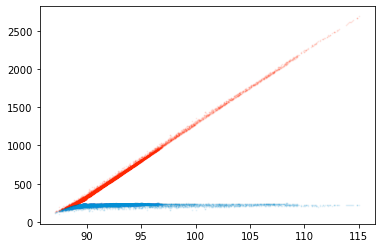

In [4]:
plt.scatter(df.PERIOD, df.APOAPSIS, color='#fe270010', s=1)
plt.scatter(df.PERIOD, df.PERIAPSIS, color='#038fd510', s=1)
plt.show()

OK this was super disappointing, because the altitude was so low when USA-193 got hit, there is no "left" part of the gabbard chart.

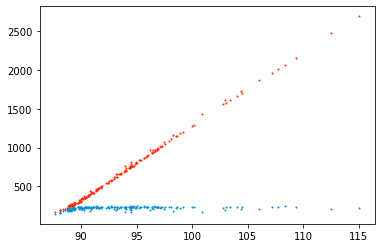

In [5]:
plt.scatter(first.PERIOD, first.APOAPSIS, color='#fe2700ff', s=1)
plt.scatter(first.PERIOD, first.PERIAPSIS, color='#038fd5ff', s=1)
plt.show()

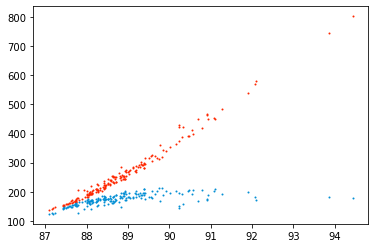

In [6]:
plt.scatter(last.PERIOD, last.APOAPSIS, color='#fe2700ff', s=1)
plt.scatter(last.PERIOD, last.PERIAPSIS, color='#038fd5ff', s=1)
plt.show()

In [75]:
test = df.groupby(['NORAD_CAT_ID']).resample('D').last()#.interpolate(method='linear', limit=31)
# interpolated linearly, not sure if it makes sense but it's the only option to do it quickly
# due to the limitation on multiindex interpolation.
test = test[["PERIOD","APOAPSIS","PERIAPSIS"]].reset_index()
test = test.set_index(["NORAD_CAT_ID","EPOCH","PERIOD"])
test2 = test.reset_index()
test = test.stack().reset_index().rename(columns={"level_3":"pa",0:"value"})
test['DAY'] = test.EPOCH.astype(int) // 86400000000000
test = test.sort_values(by=["DAY","pa"])

In [30]:
test.EPOCH.value_counts()
# looks like there won't be too many points to plot here but we should see something

2008-03-07    246
2008-03-10    240
2008-03-09    234
2008-03-11    232
2008-03-12    228
             ... 
2008-09-19      2
2009-08-23      2
2008-09-06      2
2009-08-11      2
2009-08-24      2
Name: EPOCH, Length: 263, dtype: int64

In [31]:
print(test.EPOCH.min(),test.EPOCH.max())
print(test.dtypes)

2008-02-26 00:00:00 2009-10-28 00:00:00
NORAD_CAT_ID             int64
EPOCH           datetime64[ns]
PERIOD                 float64
pa                      object
value                  float64
DAY                      int64
dtype: object


In [32]:
fig = px.scatter(test[test.DAY<14055], x="PERIOD", y="value", color="pa", title='USA-193 Debris Gabbard',animation_group="NORAD_CAT_ID", animation_frame="DAY", range_y=[100,3000], range_x=[87,115])
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 200
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 200
fig.show()

In [67]:
@gif.frame
def plot(i):
    df = test[test.DAY==i]
    fig = px.scatter(df, x="PERIOD", y="value", color="pa", title='USA-193 Debris Gabbard Diagram',animation_group="NORAD_CAT_ID", range_y=[100,400], range_x=[87,115])
    fig.update_layout(showlegend=False)
    fig.update_xaxes(title="")
    fig.update_yaxes(title="")
    fig.update_layout(width=500, height=300)
    fig['layout'].update(margin=dict(l=0,r=20,b=0,t=55))
    return fig

In [69]:
frames = []
for i in range(13935,14055):
    frame = plot(i)
    frames.append(frame)

gif.save(frames, 'example.gif', duration=100)

In [79]:

test2

fig = px.line(test2, x="PERIOD", y="PERIAPSIS", color="NORAD_CAT_ID")
fig.show()